In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

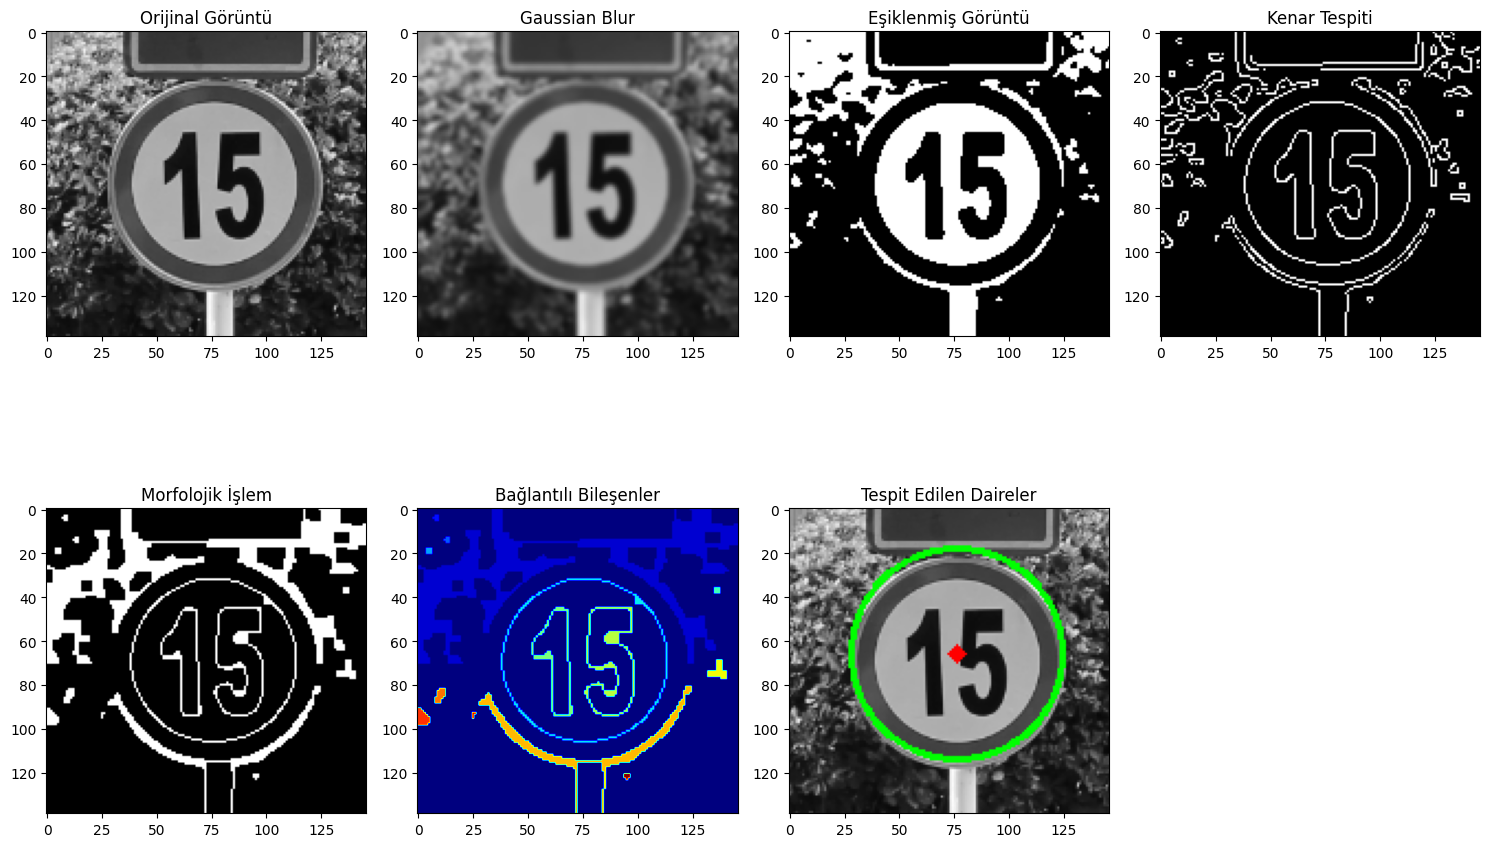

In [3]:


images_dir = 'images_gray'
test_images_dir = 'test'
train_images_dir = 'train'

# 1. Görüntüyü Yükle ve Gri Tonlamaya Çevir
gray_image =  cv2.imread(os.path.join(images_dir, train_images_dir,'train_easy_1.png'))

# 2. Gaussian Blur ile Gürültüyü Azalt
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# 3. Eşikleme ile İkili Görüntü Oluştur
_, thresholded_image = cv2.threshold(blurred_image, 120, 255, cv2.THRESH_BINARY)

# 4. Kenar Tespiti (Canny Edge Detection)
edges = cv2.Canny(thresholded_image, 100, 200)

# 5. Morfolojik Operatörler: Genişletme ve Aşındırma
kernel = np.ones((5, 5), np.uint8)
dilated_image = cv2.dilate(edges, kernel, iterations=1)
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

# 6. Bağlantılı Bileşen Analizi
num_labels, labels_im = cv2.connectedComponents(eroded_image)

# 7. Daire Tespiti (Hough Transform)
circles = cv2.HoughCircles(
    eroded_image, 
    cv2.HOUGH_GRADIENT, 
    dp=1, 
    minDist=30, 
    param1=50, 
    param2=30, 
    minRadius=10, 
    maxRadius=100
)

# Daireleri Görselleştir
output_image = gray_image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        # Daire çiz
        cv2.circle(output_image, (circle[0], circle[1]), circle[2], (0, 255, 0), 2)
        # Merkez işaretle
        cv2.circle(output_image, (circle[0], circle[1]), 2, (0, 0, 255), 3)

# Görüntüleri Görselleştir
plt.figure(figsize=(15, 10))

plt.subplot(2, 4, 1), plt.title("Orijinal Görüntü"), plt.imshow(gray_image, cmap='gray')
plt.subplot(2, 4, 2), plt.title("Gaussian Blur"), plt.imshow(blurred_image, cmap='gray')
plt.subplot(2, 4, 3), plt.title("Eşiklenmiş Görüntü"), plt.imshow(thresholded_image, cmap='gray')
plt.subplot(2, 4, 4), plt.title("Kenar Tespiti"), plt.imshow(edges, cmap='gray')
plt.subplot(2, 4, 5), plt.title("Morfolojik İşlem"), plt.imshow(eroded_image, cmap='gray')
plt.subplot(2, 4, 6), plt.title("Bağlantılı Bileşenler"), plt.imshow(labels_im, cmap='jet')
plt.subplot(2, 4, 7), plt.title("Tespit Edilen Daireler"), plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()


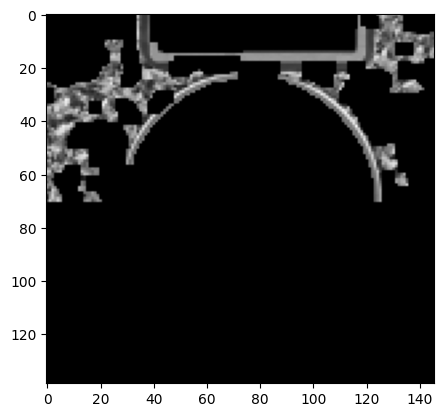

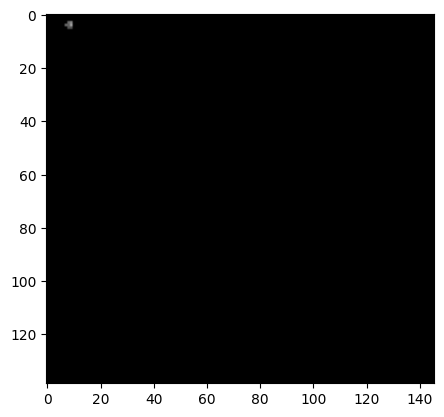

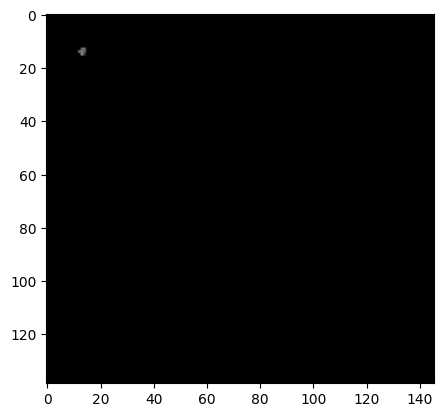

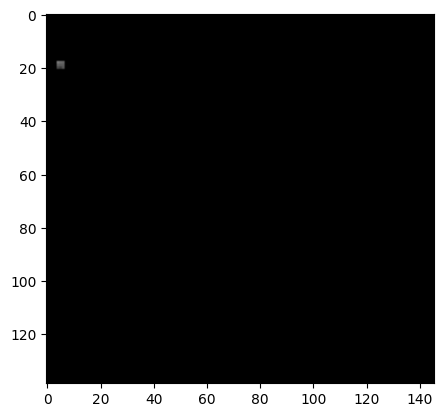

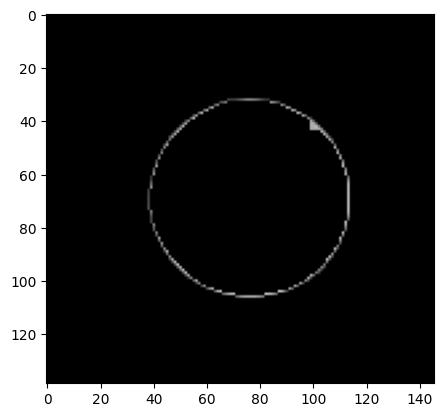

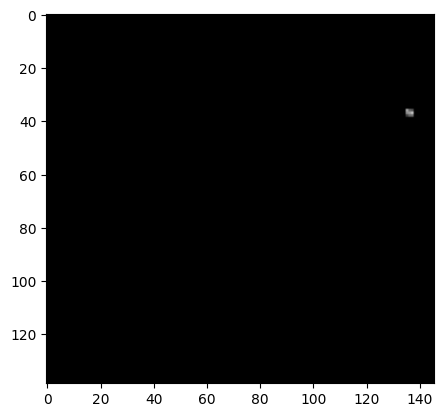

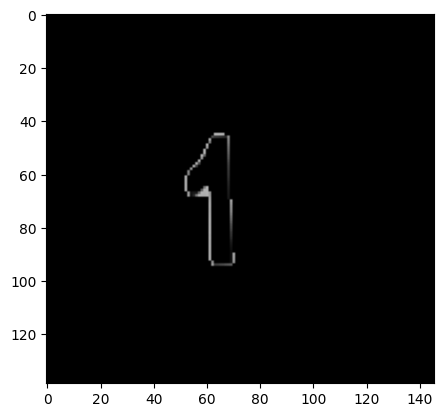

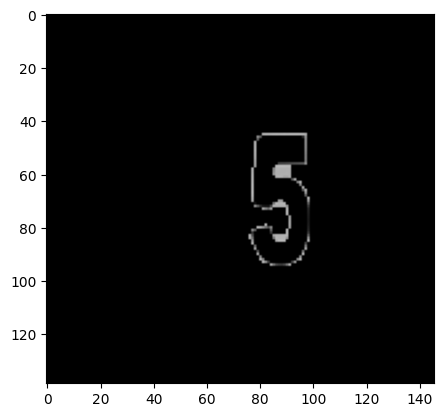

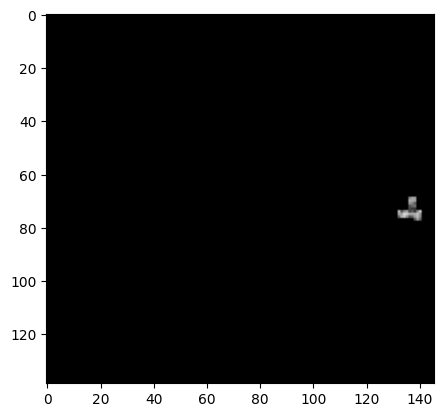

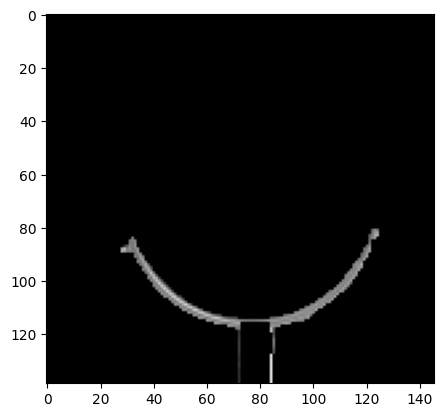

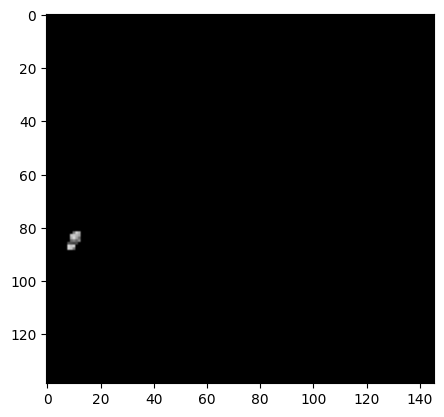

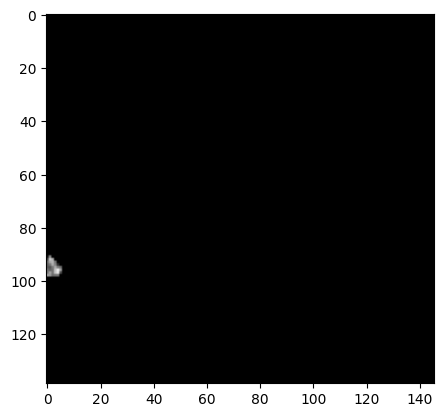

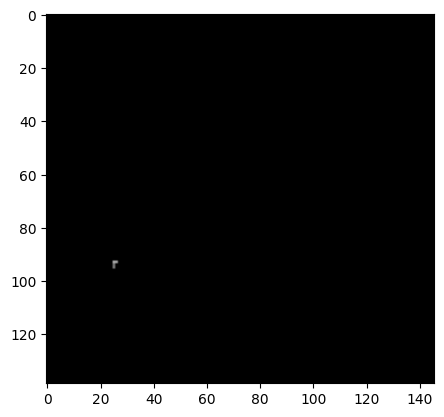

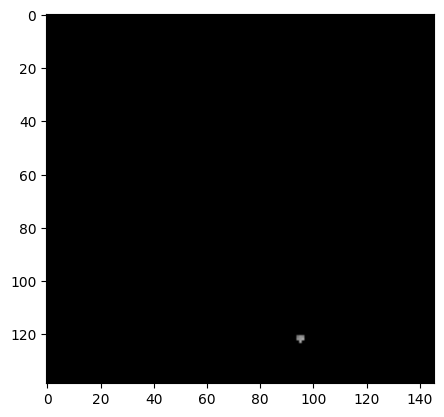

In [4]:
# show all connected components with different images
for i in range(1, num_labels):
    mask = np.uint8(labels_im == i)
    component = cv2.bitwise_and(gray_image, gray_image, mask=mask)
    plt.imshow(component, cmap='gray')
    plt.show()
